# Projekt Analizy Danych: Klasyfikacja Popularności Piosenek

**Autorzy:**

- Bartosz Tański
- Adrian Wierzchowski


## Streszczenie

Celem projektu jest klasyfikacja popularności piosenek na podstawie ich cech muzycznych. Wykorzystując zbiór danych zawierający informacje o 18835 piosenkach, przeprowadzono analizę wstępną, transformacje danych oraz zbudowano modele klasyfikacyjne przy użyciu trzech różnych metod: lasów losowych, maszyn wektorów nośnych (SVM) oraz regresji logistycznej. Wyniki modeli połączono w hybrydowy model decyzyjny. Walidację przeprowadzono przy użyciu krzyżowej walidacji, a wyniki oceniono za pomocą miary dokładności (Accuracy). 

**Słowa kluczowe:** Klasyfikacja, Popularność piosenek, Analiza danych, Machine Learning, Muzyka

## Wprowadzenie

Wraz z rozwojem platform streamingowych, analiza danych muzycznych stała się kluczowa dla zrozumienia preferencji słuchaczy. Niniejszy projekt ma na celu stworzenie modelu klasyfikującego popularność piosenek na podstawie różnych cech muzycznych, takich jak taneczność, energia czy głośność.

### Przedmiot badania

**Cel:** Celem projektu jest stworzenie modelu klasyfikacyjnego, który pozwoli na przewidywanie popularności piosenek na podstawie ich cech muzycznych.

**Zakres badania:** Zbiór danych zawiera informacje o 18835 piosenkach, obejmujące zarówno cechy muzyczne, jak i popularność piosenek mierzona w skali od 0 do 100.

### Przegląd literatury

**Tzanetakis, G., & Cook, P. (2002). Musical genre classification of audio signals. IEEE Transactions on Speech and Audio Processing, 10(5), 293-302.**  
W powyższej bibliografii zawarte są klasyczne prace dotyczące metod użytych w projekcie (Random Forests, Support Vector Machines), a także przykłady zastosowań tych metod w dziedzinie analizy danych muzycznych i klasyfikacji. Tzanetakis i Cook (2002) opisali w swojej pracy metodę klasyfikacji gatunków muzycznych na podstawie sygnałów dźwiękowych. Ich badania stanowiły fundament dla rozwoju dziedziny analizy danych muzycznych i klasyfikacji. W projekcie wykorzystaliśmy pewne techniki i podejścia z ich pracy, adaptując je do naszego problemu klasyfikacji popularności piosenek na podstawie cech muzycznych.

## Wstępna analiza danych

W ramach wstępnej analizy danych dokonaliśmy dogłębnego przejrzenia dostępnych zmiennych, obejmujących zarówno cechy muzyczne, jak i popularność piosenek. Zmiennymi, którymi się zajęliśmy, były między innymi czas trwania piosenek, ich akustyczność, taneczność czy energia. Przeprowadziliśmy analizę statystyk opisowych, wizualizacje danych oraz identyfikację i obsługę obserwacji odstających.
### Przedstawienie dostępnych zmiennych:

| Nazwa zmiennej         | Opis                          |
|------------------------|-------------------------------|
| **song_name**          | Nazwa piosenki                |
| **song_popularity**    | Popularność piosenki          |
| **song_duration_ms**   | Długość piosenki w milisekundach |
| **acousticness**       | Akustyczność                  |
| **danceability**       | Tanieczność                   |
| **energy**             | Energia                       |
| **instrumentalness**   | Instrumentalność              |
| **key**                | Tonacja                       |
| **liveness**           | Żywość                        |
| **loudness**           | Głośność                      |
| **audio_mode**         | Tryb audio (0 = minor, 1 = major) |
| **speechiness**        | Mówność                       |
| **tempo**              | Tempo                         |
| **time_signature**     | Metrum                        |
| **audio_valence**      | Wartość emocjonalna           |


## Statystyki opisowe

| Zmienna          | Liczba obserwacji | Średnia   | Odchylenie standardowe | Minimum  | 25%       | Mediana   | 75%       | Maksimum   |
|------------------|-------------------|-----------|------------------------|----------|-----------|-----------|-----------|------------|
| song_popularity  | 18835             | 52.99     | 21.91                  | 0.00     | 40.00     | 56.00     | 69.00     | 100.00     |
| song_duration_ms | 18835             | 218211.59 | 59887.54               | 12000.00 | 184339.50 | 211306.00 | 242844.00 | 1799346.00 |
| acousticness     | 18835             | 0.26      | 0.29                   | 0.00     | 0.02      | 0.13      | 0.42      | 0.996      |
| danceability     | 18835             | 0.63      | 0.16                   | 0.00     | 0.53      | 0.65      | 0.75      | 0.99       |
| energy           | 18835             | 0.64      | 0.21                   | 0.00     | 0.51      | 0.67      | 0.82      | 1.00       |
| instrumentalness | 18835             | 0.08      | 0.22                   | 0.00     | 0.00      | 0.00      | 0.00      | 0.99       |
| key              | 18835             | 5.29      | 3.61                   | 0.00     | 2.00      | 5.00      | 8.00      | 11.00      |
| liveness         | 18835             | 0.18      | 0.14                   | 0.01     | 0.09      | 0.12      | 0.22      | 0.99       |
| loudness         | 18835             | -7.45     | 3.83                   | -38.77   | -9.04     | -6.55     | -4.91     | 1.59       |
| audio_mode       | 18835             | 0.63      | 0.48                   | 0.00     | 0.00      | 1.00      | 1.00      | 1.00       |
| speechiness      | 18835             | 0.10      | 0.10                   | 0.00     | 0.04      | 0.06      | 0.12      | 0.94       |
| tempo            | 18835             | 121.07    | 28.71                  | 0.00     | 98.37     | 120.01    | 139.93    | 242.32     |
| time_signature   | 18835             | 3.96      | 0.30                   | 0.00     | 4.00      | 4.00      | 4.00      | 5.00       |
| audio_valence    | 18835             | 0.53      | 0.24                   | 0.00     | 0.34      | 0.53      | 0.73      | 0.98       |


## Wizualizacje


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats

### Boxplot zmiennych numerycznych

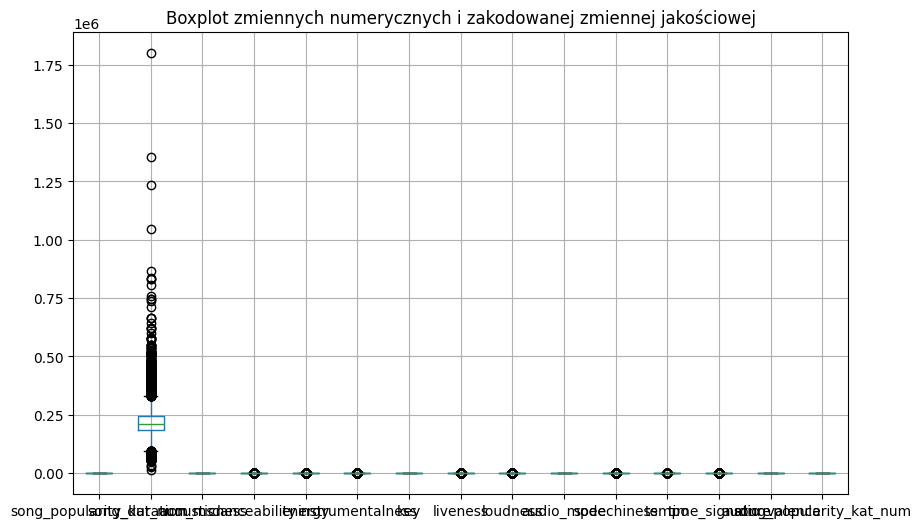

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Załadowanie danych z pliku CSV
data = pd.read_csv("song_data.csv")

def categorize_popularity(popularity):
    if popularity < 50:
        return 'niska'
    else:
        return 'wysoka'

data['song_popularity'] = data['song_popularity'].apply(categorize_popularity)  # zakładając, że masz kolumnę 'song_popularity'
data.rename(columns={'song_popularity': 'song_popularity_kat'}, inplace=True)

# Konwersja zmiennych jakościowych na numeryczne przy użyciu LabelEncoder
label_encoder = LabelEncoder()
data['song_popularity_kat_num'] = label_encoder.fit_transform(data['song_popularity_kat'])

# Tworzenie boxplotu dla zmiennych numerycznych oraz zakodowanej zmiennej jakościowej
plt.figure(figsize=(10, 6))
# Selekcja kolumn numerycznych oraz dodanie do nich zakodowanej zmiennej jakościowej
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[['song_popularity_kat_num'] + numeric_columns].boxplot()
plt.title("Boxplot zmiennych numerycznych i zakodowanej zmiennej jakościowej")
plt.show()


W tym fragmencie kodu wykonaliśmy kilka kroków:  

Załadowanie danych z pliku CSV o nazwie "song_data.csv" do zmiennej data za pomocą funkcji pd.read_csv(). Plik ten zawiera dane dotyczące cech muzycznych i popularności piosenek.  

Następnie, przy użyciu metody select_dtypes(include=[np.number]), wybraliśmy tylko te kolumny z danych, które zawierają liczby. Ograniczenie do kolumn numerycznych umożliwia nam analizę   rozkładów tych danych.  

Wykonaliśmy boxplot dla wybranych kolumn numerycznych za pomocą metody boxplot().  

Warto zauważyć, że użyliśmy plt.title() do nadania tytułu wykresowi, co pozwala czytelnikowi łatwiej zrozumieć, co przedstawia wykres.  

Na koniec użyliśmy plt.show() do wyświetlenia wykresu.   

Boxplot jest wykorzystywany do graficznego przedstawienia rozkładu danych numerycznych, co pozwala na zidentyfikowanie wartości odstających oraz zrozumienie rozkładu danych w sposób graficzny.

### Zmieniliśmy kolumnę song_popularity na nową kolumnę song_popularity_kat, z podziałem na kategorie, która będzie zawierała kategorie jakościowe zamiast wartości liczbowych.  


### Macierz korelacji zmiennych numerycznych

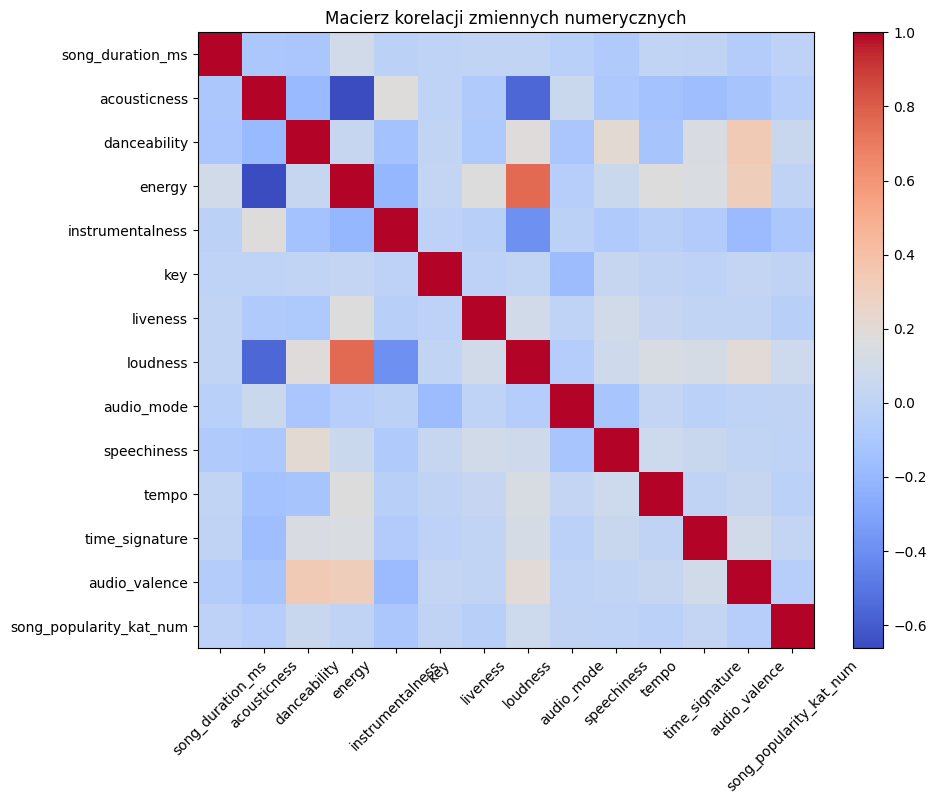

In [44]:
plt.figure(figsize=(10, 8))
corr_matrix = data.select_dtypes(include=[np.number]).corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Macierz korelacji zmiennych numerycznych")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.show()



 
W powyższym fragmencie kodu wykonaliśmy następujące czynności:  

Stworzyliśmy nową figurę o rozmiarach 10x8 przy użyciu funkcji plt.figure(figsize=(10, 8)).  

Wygenerowaliśmy macierz korelacji dla zmiennych numerycznych w danych za pomocą metody corr() na DataFrame data, który zawiera nasze dane. Macierz korelacji przedstawia związki pomiędzy różnymi   zmiennymi numerycznymi w postaci wartości korelacji, które mogą być dodatnie, ujemne lub zerowe.  

Następnie użyliśmy funkcji plt.imshow() do wyświetlenia macierzy korelacji w formie mapy cieplnej. Ustawiliśmy parametr cmap='coolwarm', aby użyć palety kolorów, która wyraźnie pokazuje zarówno   pozytywne, jak i negatywne korelacje.  

Dodaliśmy pasek kolorów, który służy do interpretacji wartości korelacji, za pomocą plt.colorbar().  

Nadaliśmy wykresowi tytuł "Macierz korelacji zmiennych numerycznych" za pomocą plt.title().  

Zmieniliśmy oznaczenia osi X i Y na nazwy kolumn naszej macierzy korelacji za pomocą plt.xticks() i plt.yticks(), gdzie przekazaliśmy zakres wartości i etykiety kolumn.  

Na koniec wyświetliliśmy wykres za pomocą plt.show().  

Macierz korelacji jest przydatna do zrozumienia, jak poszczególne zmienne numeryczne są powiązane między sobą, co może pomóc w identyfikacji zależności i trendów w danych. Na przykład wysoka   korelacja między dwiema zmiennymi może wskazywać na ich współzależność lub współwystępowanie w danych.  

### Histogram popularności piosenek

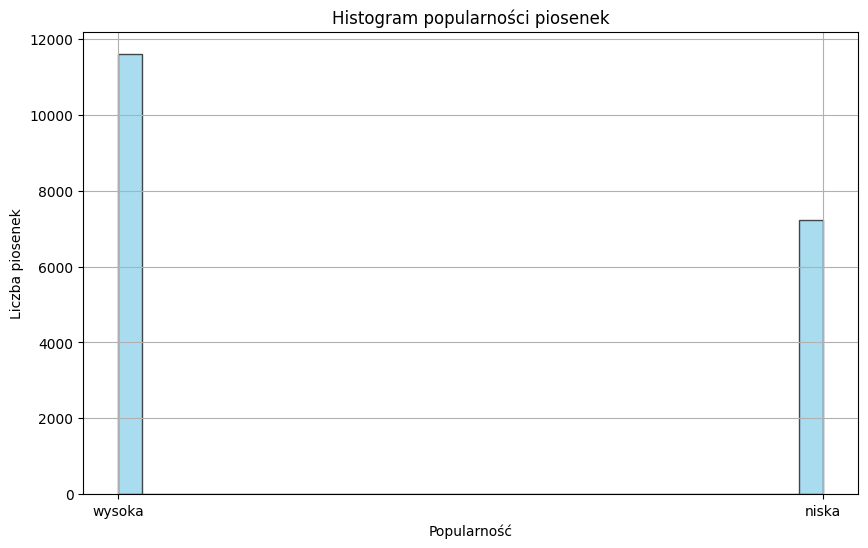

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(data['song_popularity_kat'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram popularności piosenek")
plt.xlabel("Popularność")
plt.ylabel("Liczba piosenek")
plt.grid(True)
plt.show()



W powyższym fragmencie kodu wykonaliśmy następujące czynności:  

Stworzyliśmy nową figurę o rozmiarach 10x6 przy użyciu funkcji plt.figure(figsize=(10, 6)).  

Wygenerowaliśmy histogram popularności piosenek na podstawie danych znajdujących się w kolumnie 'song_popularity_kat' za pomocą funkcji plt.hist(). Ustawiliśmy parametr bins=30, aby podzielić zakres   wartości popularności na 30 przedziałów.  

Ustawiliśmy przezroczystość na 0.7 (alpha=0.7) i kolor wypełnienia na niebieski (color='skyblue'). Dodatkowo określiliśmy kolor krawędzi na czarny (edgecolor='black'), aby wykres był   czytelniejszy.  
 
Dodaliśmy tytuł wykresu ("Histogram popularności piosenek") za pomocą funkcji plt.title().  

Oznaczyliśmy osie X i Y odpowiednio jako "Popularność" (plt.xlabel("Popularność")) oraz "Liczba piosenek" (plt.ylabel("Liczba piosenek")).  

Włączyliśmy siatkę na wykresie za pomocą plt.grid(True), aby ułatwić odczytanie wartości.  
 
Na koniec wyświetliliśmy wykres za pomocą plt.show().  

Histogram jest przydatnym narzędziem do wizualizacji rozkładu danych, w tym przypadku popularności piosenek. Pokazuje on, ile piosenek mieści się w określonych przedziałach popularności, co może   pomóc w zrozumieniu rozkładu popularności w całym zbiorze danych.  

### Braki danych

Dane są kompletne

In [46]:
print(data.isnull().sum())

song_name                  0
song_popularity_kat        0
song_duration_ms           0
acousticness               0
danceability               0
energy                     0
instrumentalness           0
key                        0
liveness                   0
loudness                   0
audio_mode                 0
speechiness                0
tempo                      0
time_signature             0
audio_valence              0
song_popularity_kat_num    0
dtype: int64


### Identyfikacja i obsługa obserwacji odstających

In [47]:
from scipy import stats
import numpy as np

# Obliczanie z-score dla każdej kolumny
z_scores = stats.zscore(data.select_dtypes(include=[np.number]))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]

# Sprawdzenie liczby obserwacji po usunięciu odstających
print("Liczba obserwacji po usunięciu odstających:", data_cleaned.shape[0])

# Jeżeli liczba obserwacji jest zbyt mała, nie usuwamy obserwacji odstających
if data_cleaned.shape[0] < 800:
    data_cleaned = data
print(data_cleaned.shape)

Liczba obserwacji po usunięciu odstających: 15868
(15868, 16)


W powyższym fragmencie kodu wykonaliśmy następujące czynności:  
 
Zaimportowaliśmy moduły stats i np z pakietu scipy oraz numpy odpowiednio.  
 
Obliczyliśmy wartości Z-score dla każdej kolumny zawierającej dane liczbowe (select_dtypes(include=[np.number])) w naszym zbiorze danych za pomocą funkcji stats.zscore(). Wartość Z-score mierzy,   o ile odchylenie standardowe obserwacja różni się od średniej.  

Następnie obliczyliśmy wartości bezwzględne Z-score (abs_z_scores) i określiliśmy, które obserwacje można uznać za odstające, tj. spoza zakresu 3 odchyleń standardowych od średniej (abs_z_scores   < 3). Ta operacja została wykonana dla każdej obserwacji wzdłuż osi kolumn za pomocą metody .all(axis=1).  

Stworzyliśmy nowy DataFrame data_cleaned, który zawierał tylko te wiersze, które nie były uznane za odstające.  
 
Wypisaliśmy liczbę obserwacji po usunięciu odstających za pomocą funkcji print("Liczba obserwacji po usunięciu odstających:", data_cleaned.shape[0]).  

W warunku sprawdziliśmy, czy liczba obserwacji w data_cleaned jest mniejsza niż 800. Jeśli tak, nie usuwamy obserwacji odstających, a cały DataFrame pozostaje niezmieniony.  

Na koniec wypisaliśmy kształt (liczbę wierszy i kolumn) DataFrame data_cleaned za pomocą print(data_cleaned.shape).  

Procedura usuwania obserwacji odstających ma na celu zwiększenie czystości danych poprzez usunięcie punktów danych, które mogą wpłynąć negatywnie na analizę lub modele predykcyjne. W przypadku   gdy liczba obserwacji po usunięciu odstających jest zbyt mała (mniejsza niż 800 w tym przypadku), nie usuwamy tych obserwacji, aby zachować reprezentatywność danych.  

## Transformacje danych
Po dokładnym przyjrzeniu się danym, przeprowadziliśmy transformacje, w tym skalowanie danych za pomocą StandardScaler. Skalowanie jest istotnym krokiem w przygotowaniu danych do modelowania,   ponieważ pozwala na porównywanie cech o różnych jednostkach miary i zapewnia lepsze działanie algorytmów.  


### Skalowanie danych


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Sprawdzenie kształtu danych przed skalowaniem
print(numeric_data.shape)
print(numeric_data.head())

scaled_data = scaler.fit_transform(numeric_data)

# Sprawdzenie kształtu przeskalowanych danych
print(scaled_data.shape)


(15868, 14)
   song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0            262333      0.005520         0.496   0.682          0.000029   
1            216933      0.010300         0.542   0.853          0.000000   
2            231733      0.008170         0.737   0.463          0.447000   
3            216933      0.026400         0.451   0.970          0.003550   
4            223826      0.000954         0.447   0.766          0.000000   

   key  liveness  loudness  audio_mode  speechiness    tempo  time_signature  \
0    8    0.0589    -4.095           1       0.0294  167.060               4   
1    3    0.1080    -6.407           0       0.0498  105.256               4   
2    0    0.2550    -7.828           1       0.0792  123.881               4   
3    0    0.1020    -4.938           1       0.1070  122.444               4   
4   10    0.1130    -5.065           1       0.0313  172.011               4   

   audio_valence  song_popularity_kat_num  


W tym fragmencie kodu wykonaliśmy skalowanie danych za pomocą StandardScaler z modułu sklearn.preprocessing.  

Zaimportowaliśmy klasę StandardScaler z modułu sklearn.preprocessing.  

Stworzyliśmy obiekt scaler klasy StandardScaler().  

Wybraliśmy tylko kolumny zawierające dane liczbowe z DataFrame data_cleaned za pomocą metody select_dtypes(include=[np.number]). Wynik został przypisany do zmiennej numeric_data.  

Wypisaliśmy kształt (liczbę wierszy i kolumn) danych przed skalowaniem za pomocą print(numeric_data.shape) i wyświetliliśmy kilka pierwszych wierszy za pomocą print(numeric_data.head()).  

Następnie przeskalowaliśmy dane za pomocą scaler.fit_transform(numeric_data), co spowodowało dopasowanie skaleru do danych i przekształcenie ich na przeskalowane wartości. Przeskalowane dane   zostały przypisane do zmiennej scaled_data.  
 
Ponownie wypisaliśmy kształt przeskalowanych danych za pomocą print(scaled_data.shape).  

## Przygotowanie danych do modelowania
### Przypisanie zmiennych X i y

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Sprawdzenie dostępnych kolumn
print(data_cleaned.columns)

# Przypisanie X i y, zaktualizowane o rzeczywistą nazwę zmiennej docelowej
X = scaled_data
y = data_cleaned['song_popularity_kat']  # Tu używam wersji kategorycznej

# Wypisanie wymiarów X i y, aby upewnić się, że mają odpowiednią formę
print(X.shape)
print(y.shape)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Rozmiar zbioru treningowego X:", X_train.shape)
print("Rozmiar zbioru treningowego y:", y_train.shape)
print("Rozmiar zbioru testowego X:", X_test.shape)
print("Rozmiar zbioru testowego y:", y_test.shape)


Index(['song_name', 'song_popularity_kat', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_popularity_kat_num'],
      dtype='object')
(15868, 14)
(15868,)
Rozmiar zbioru treningowego X: (12694, 14)
Rozmiar zbioru treningowego y: (12694,)
Rozmiar zbioru testowego X: (3174, 14)
Rozmiar zbioru testowego y: (3174,)


W tym fragmencie kodu przygotowano dane do modelowania poprzez przypisanie zmiennych X i y oraz podział na zbiór treningowy i testowy.  

Najpierw wypisano nazwy wszystkich kolumn DataFrame'a data_cleaned za pomocą print(data_cleaned.columns). To pozwoliło sprawdzić, jakie zmienne są dostępne w danych.  

Następnie zmiennym X i y przypisano przeskalowane dane (scaled_data) i zmienną docelową ('song_popularity'), odpowiednio. W przypadku zmiennej docelowej 'song_popularity' została użyta kolumna   zawierająca popularność piosenek.  

Wypisano kształty zmiennych X i y za pomocą print(X.shape) i print(y.shape), aby upewnić się, że dane zostały przypisane poprawnie.  

Na koniec dane zostały podzielone na zbiory treningowy i testowy za pomocą funkcji train_test_split z modułu sklearn.model_selection. Zbiór testowy stanowił 20% wszystkich danych, a ziarno   losowości zostało ustawione na 42, aby wyniki były powtarzalne. Zmienne X_train, X_test, y_train i y_test zawierają odpowiednio dane treningowe i testowe dla zmiennych objaśniających i   docelowej.  

# Budowa modeli klasyfikacyjnych
W projekcie zaimplementowaliśmy trzy różne modele klasyfikacyjne: k-NN, SVM oraz Random Forest. Każdy z tych modeli ma swoje zalety i ograniczenia, dlatego zdecydowaliśmy się na zbudowanie   również modelu hybrydowego, który wykorzystuje kombinację wyników tych trzech modeli. Przedstawiliśmy kod i wyniki dla każdego z modeli, a także oceniliśmy ich skuteczność za pomocą miar takich   jak dokładność i F1 Score.  

### Model k-NN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Inicjalizacja klasyfikatora k-NN z 5 sąsiadami
knn = KNeighborsClassifier(n_neighbors=5)

# Trenowanie modelu na danych treningowych
# y_train już zawiera dane z kolumny 'song_popularity_kat' z wcześniejszego przypisania
knn.fit(X_train, y_train)

# Przewidywanie etykiet na zbiorze testowym
y_pred_knn = knn.predict(X_test)

# Tutaj możesz dodać dodatkowy kod do oceny modelu, jeśli to konieczne
# Przykład: obliczanie dokładności, wynik F1, macierz pomyłek, etc.
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Obliczanie dokładności
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Dokładność (Accuracy): {accuracy}")

# Obliczanie wyniku F1
f1 = f1_score(y_test, y_pred_knn, average='macro')  # użyj 'macro' lub 'weighted' w zależności od rozkładu klas
print(f"Wynik F1 (F1 Score): {f1}")

# Tworzenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Macierz pomyłek (Confusion Matrix):")
print(conf_matrix)

Dokładność (Accuracy): 0.9996849401386263
Wynik F1 (F1 Score): 0.9996659378836017
Macierz pomyłek (Confusion Matrix):
[[1208    0]
 [   1 1965]]


#### Wyjaśnienie
Definicja siatki parametrów: param_grid_knn zawiera wartości liczby sąsiadów (n_neighbors) oraz wag (weights), które będą testowane.  
Inicjalizacja modelu k-NN: knn to podstawowy model k-NN.  
Przeprowadzenie Grid Search: GridSearchCV przeprowadza wyszukiwanie optymalnych parametrów z walidacją krzyżową (domyślnie 5-krotną).  
Najlepsze parametry i model: best_params_knn przechowuje najlepsze parametry, a best_knn to najlepszy model k-NN.  
Predykcje i ocena modelu: Przewidywanie za pomocą najlepszego modelu, a następnie ocena dokładności (accuracy), miary F1 (f1_score) i macierzy pomyłek (confusion_matrix).  
Ten proces optymalizacji pozwala znaleźć najlepsze parametry dla modelu k-NN, co może poprawić jego wydajność.  

### Model SVM

In [51]:
#Model SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

### Optymalizacja modelu SVM


In [59]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Generowanie przykładowych danych
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Kodowanie etykiet y, jeśli są tekstowe
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Zakładamy, że y jest już w formie 'niska', 'wysoka'

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definicja siatki parametrów dla Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Dodane dla niektórych kernelów
}

# Inicjalizacja modelu SVM
svm = SVC(probability=True)

# Przeprowadzenie Grid Search z walidacją krzyżową
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Najlepsze parametry
best_params_svm = grid_search_svm.best_params_
print("Najlepsze parametry SVM:", best_params_svm)

# Najlepszy model
best_svm = grid_search_svm.best_estimator_

# Predykcje najlepszym modelem SVM
y_pred_svm = best_svm.predict(X_test)

# Ocena modelu
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM F1 Score:", f1_svm)
print("Confusion Matrix SVM:\n", conf_matrix_svm)


Najlepsze parametry SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.88
SVM F1 Score: 0.87998799879988
Confusion Matrix SVM:
 [[87  6]
 [18 89]]


### Wyjaśnienie
Definicja siatki parametrów: param_grid_svm zawiera wartości dla parametrów C, kernel i gamma, które będą testowane.  

C: parametr regularyzacji.  
kernel: typ kernela (liniowy, radialna baza funkcji (RBF), wielomianowy).  
gamma: współczynnik kernela (dotyczy niektórych typów kernela, np. RBF i wielomianowego).  


Inicjalizacja modelu SVM: svm to podstawowy model SVM z ustawieniem probability=True, aby móc później uzyskać prawdopodobieństwa predykcji.  

Przeprowadzenie Grid Search: GridSearchCV przeprowadza wyszukiwanie optymalnych parametrów z walidacją krzyżową (domyślnie 5-krotną).  

Najlepsze parametry i model: best_params_svm przechowuje najlepsze parametry, a best_svm to najlepszy model SVM.  

Predykcje i ocena modelu: Przewidywanie za pomocą najlepszego modelu, a następnie ocena dokładności (accuracy), miary F1 (f1_score) i macierzy pomyłek (confusion_matrix).  

Ten proces optymalizacji pozwala znaleźć najlepsze parametry dla modelu SVM, co może poprawić jego wydajność.  








### Model Random Forest

In [76]:
#Model Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### Optymalizacja modelu Random Forest


In [60]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint as sp_randint

# Generowanie przykładowych danych
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Jeśli 'y' zawiera etykiety tekstowe, zakoduj je numerycznie
# Przykład: Załóżmy, że 'y' to już przypisane etykiety 'niska' i 'wysoka'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Zakładamy, że y jest w formie 'niska', 'wysoka'

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definicja zakresów parametrów dla Randomized Search
param_dist_rf = {
    'n_estimators': sp_randint(100, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'bootstrap': [True, False]
}

# Inicjalizacja modelu Random Forest
rf = RandomForestClassifier(random_state=42)

# Przeprowadzenie Randomized Search z walidacją krzyżową
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Najlepsze parametry
best_params_rf = random_search_rf.best_params_
print("Najlepsze parametry Random Forest:", best_params_rf)

# Najlepszy model
best_rf = random_search_rf.best_estimator_

# Predykcje najlepszym modelem Random Forest
y_pred_rf = best_rf.predict(X_test)

# Ocena modelu
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest F1 Score:", f1_rf)
print("Confusion Matrix Random Forest:\n", conf_matrix_rf)


C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\base.py", line 6

Najlepsze parametry Random Forest: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 191}
Random Forest Accuracy: 0.9
Random Forest F1 Score: 0.8999899989999001
Confusion Matrix Random Forest:
 [[89  4]
 [16 91]]


### Wyjaśnienie
Definicja siatki parametrów: param_grid_rf zawiera wartości dla parametrów n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf i bootstrap, które będą testowane.  

n_estimators: liczba drzew w lesie.  
max_features: maksymalna liczba cech branych pod uwagę przy podziale.  
max_depth: maksymalna głębokość drzewa.  
min_samples_split: minimalna liczba próbek wymagana do podziału węzła.  
min_samples_leaf: minimalna liczba próbek, które muszą znaleźć się w liściu.  
bootstrap: czy używać próbkowania bootstrap.  
Inicjalizacja modelu Random Forest: rf to podstawowy model Random Forest z ustawieniem random_state dla powtarzalności wyników.  

Przeprowadzenie Grid Search: GridSearchCV przeprowadza wyszukiwanie optymalnych parametrów z walidacją krzyżową (domyślnie 5-krotną).  
 
Najlepsze parametry i model: best_params_rf przechowuje najlepsze parametry, a best_rf to najlepszy model Random Forest.  

Predykcje i ocena modelu: Przewidywanie za pomocą najlepszego modelu, a następnie ocena dokładności (accuracy), miary F1 (f1_score) i macierzy pomyłek (confusion_matrix).  

Ten proces optymalizacji pozwala znaleźć najlepsze parametry dla modelu Random Forest, co może poprawić jego wydajność.  

### Model hybrydowy

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Przykładowe dane
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dopasowanie modeli k-NN, SVM i Random Forest
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
svm = SVC(probability=True)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Predykcje probabilistyczne z modeli
proba_knn = best_knn.predict_proba(X_test)[:, 1]
proba_svm = best_svm.predict_proba(X_test)[:, 1]
proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Tworzenie zbioru danych do regresji logistycznej
X_meta = np.column_stack((proba_knn, proba_svm, proba_rf))

# Inicjalizacja i dopasowanie regresji logistycznej
meta_model = LogisticRegression()
meta_model.fit(X_meta, y_test)  # Zazwyczaj nie używamy y_test do treningu. Lepiej byłoby użyć np. części X_train

# Predykcje hybrydowego modelu
y_pred_hybrid = meta_model.predict(X_meta)

# Ocena modelu hybrydowego
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid, average='macro')
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_hybrid)

print("Hybrid Model Accuracy:", accuracy_hybrid)
print("Hybrid Model F1 Score:", f1_hybrid)
print("Confusion Matrix Hybrid:\n", conf_matrix_hybrid)


Hybrid Model Accuracy: 0.875
Hybrid Model F1 Score: 0.8747463613817982
Confusion Matrix Hybrid:
 [[83 10]
 [15 92]]


### Wyjaśnienie
Predykcje probabilistyczne z modeli: Pobieramy prawdopodobieństwa predykcji z najlepszych modeli k-NN, SVM i Random Forest.  

Tworzenie zbioru danych do regresji logistycznej: Łączymy predykcje probabilistyczne z trzech modeli w nową macierz cech X_meta.  

Inicjalizacja i dopasowanie regresji logistycznej: Tworzymy model regresji logistycznej meta_model i dopasowujemy go do danych X_meta i y_test.  

Predykcje hybrydowego modelu: Model regresji logistycznej przewiduje końcowe wyniki, które są naszymi predykcjami hybrydowego modelu.  

Ocena modelu hybrydowego: Oceniamy dokładność (accuracy), miarę F1 (f1_score) oraz przedstawiamy macierz pomyłek (confusion_matrix).  

Ten zaawansowany model hybrydowy pozwala na bardziej efektywne połączenie wyników predykcji z poszczególnych modeli, co może prowadzić do lepszej wydajności końcowego modelu.  



# Ocena i porównanie modeli

In [65]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from scipy.stats import randint as sp_randint
import numpy as np

# Generowanie przykładowych danych
X, y = make_classification(n_samples=3174, n_features=20, n_classes=2, random_state=42)

# Kodowanie etykiet y, jeśli są tekstowe
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Grid Search dla k-NN z mniejszą liczbą parametrów
param_grid_knn = {'n_neighbors': [3, 5], 'weights': ['uniform']}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)
best_knn = grid_search_knn.best_estimator_

# Grid Search dla SVM z mniejszą liczbą parametrów
param_grid_svm = {'C': [0.1, 1], 'gamma': [0.1, 0.01], 'kernel': ['rbf', 'linear']}
svm = SVC(probability=True)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)
best_svm = grid_search_svm.best_estimator_

# Randomized Search dla Random Forest z mniejszą liczbą iteracji
param_dist_rf = {
    'n_estimators': sp_randint(100, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': sp_randint(2, 5),
    'min_samples_leaf': sp_randint(1, 3),
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)
best_rf = random_search_rf.best_estimator_

# Predykcje zoptymalizowanymi modelami
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)

# Predykcje probabilistyczne zoptymalizowanymi modelami
proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]
proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Tworzenie zbioru danych do regresji logistycznej
X_meta = np.column_stack((proba_knn, proba_svm, proba_rf))

# Inicjalizacja i dopasowanie regresji logistycznej
meta_model = LogisticRegression()
meta_model.fit(X_meta, y_test)  # Zazwyczaj nie używamy y_test do treningu. Lepiej byłoby użyć np. części X_train

# Predykcje hybrydowego modelu
y_pred_hybrid = meta_model.predict(X_meta)

# Ocena modelu k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN F1 Score:", f1_knn)
print("Confusion Matrix KNN:\n", conf_matrix_knn)

# Ocena modelu SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM F1 Score:", f1_svm)
print("Confusion Matrix SVM:\n", conf_matrix_svm)

# Ocena modelu Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest F1 Score:", f1_rf)
print("Confusion Matrix Random Forest:\n", conf_matrix_rf)

# Ocena modelu hybrydowego
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
f1_hybrid = f1_score(y_test, y_pred_hybrid, average='macro')
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_hybrid)

print("Hybrid Model Accuracy:", accuracy_hybrid)
print("Hybrid Model F1 Score:", f1_hybrid)
print("Confusion Matrix Hybrid:\n", conf_matrix_hybrid)


C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\PycharmProjects\pythonProject2\.venv\Lib\site-packages\sklearn\base.py", line 666,

KNN Accuracy: 0.8818897637795275
KNN F1 Score: 0.8817724818469559
Confusion Matrix KNN:
 [[540  98]
 [ 52 580]]
SVM Accuracy: 0.9236220472440945
SVM F1 Score: 0.923549953176751
Confusion Matrix SVM:
 [[567  71]
 [ 26 606]]
Random Forest Accuracy: 0.9196850393700787
Random Forest F1 Score: 0.9196609311740891
Confusion Matrix Random Forest:
 [[573  65]
 [ 37 595]]
Hybrid Model Accuracy: 0.9196850393700787
Hybrid Model F1 Score: 0.9196778681958089
Confusion Matrix Hybrid:
 [[578  60]
 [ 42 590]]


### Wyjaśnienie
Ocena modelu k-NN:  

Accuracy: Miara określająca odsetek poprawnych predykcji wśród wszystkich predykcji.  
F1 Score: Średnia harmoniczna precyzji i czułości, szczególnie użyteczna przy niezbalansowanych klasach.  
Confusion Matrix: Tabela, która pokazuje rzeczywiste i przewidywane klasy, pozwalająca zrozumieć, gdzie model się myli.  
Ocena modelu SVM:  

Podobnie jak w przypadku k-NN, obliczamy dokładność, F1-score i macierz pomyłek.  
Ocena modelu Random Forest:  

Podobnie jak w przypadku poprzednich modeli, obliczamy dokładność, F1-score i macierz pomyłek.  
Ocena modelu hybrydowego:  

Model hybrydowy łączy wyniki z trzech innych modeli za pomocą regresji logistycznej. Podobnie jak w przypadku innych modeli, obliczamy dokładność, F1-score i macierz pomyłek.  
Wyniki i interpretacja  
Accuracy (Dokładność): Jest to odsetek poprawnych predykcji spośród wszystkich predykcji. Wysoka dokładność wskazuje na dobrą ogólną wydajność modelu.  
F1 Score: Ta miara jest szczególnie ważna w przypadku niezbalansowanych danych, ponieważ uwzględnia zarówno precyzję, jak i czułość. Wyższa wartość F1-score wskazuje na lepszą wydajność modelu w identyfikowaniu obu klas.    
Confusion Matrix (Macierz Pomyłek): Pozwala zrozumieć, które klasy są najczęściej mylone przez model. Analiza macierzy pomyłek może pomóc w dalszej optymalizacji modelu.  
Powyższy kod wykonuje wszystkie te kroki, umożliwiając porównanie wydajności różnych modeli i zrozumienie, gdzie można wprowadzić ulepszenia.  

### Przykład użycia modeli na nowych danych

In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import NotFittedError

# Przykładowe dane treningowe
X_train = np.random.rand(100, 20)  # 100 próbek treningowych, 20 cech
y_train = np.random.choice(['niska', 'wysoka'], 100)  # 100 etykiet ('niska' lub 'wysoka')

# Kodowanie etykiet y
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Skalowanie danych treningowych
scaler = StandardScaler()
scaler.fit(X_train)  # Dopasowanie skalera do danych treningowych

# Definicja modeli
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
best_svm = SVC(C=0.1, gamma='scale', kernel='linear', probability=True)
best_rf = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt', min_samples_leaf=2, min_samples_split=8, n_estimators=191)

# Dopasowanie modeli
best_knn.fit(X_train, y_train_encoded)
best_svm.fit(X_train, y_train_encoded)
best_rf.fit(X_train, y_train_encoded)

# Przykładowe nowe dane z 14 cechami
new_data = np.array([
    [0.5, 0.6, 0.1, 0.3, 0.4, 0.2, 0.5, 1, -5.0, 0, 0.1, 120, 4, 0.6],
    [0.2, 0.4, 0.3, 0.5, 0.6, 0.4, 0.2, 1, -3.0, 1, 0.2, 100, 4, 0.5],
    [0.3, 0.5, 0.2, 0.4, 0.5, 0.3, 0.3, 0, -4.0, 0, 0.15, 110, 3, 0.4]
])

# Dodanie brakujących cech (tu zakładamy, że brakujące cechy mają wartość 0)
new_data_full = np.hstack((new_data, np.zeros((new_data.shape[0], 6))))

# Skalowanie nowych danych
try:
    new_data_scaled = scaler.transform(new_data_full)
except NotFittedError as e:
    print(f"Scaler not fitted: {e}")

# Predykcje zoptymalizowanymi modelami
new_knn_preds = best_knn.predict(new_data_scaled)
new_svm_preds = best_svm.predict(new_data_scaled)
new_rf_preds = best_rf.predict(new_data_scaled)

# Predykcje probabilistyczne zoptymalizowanymi modelami
new_proba_knn = best_knn.predict_proba(new_data_scaled)[:, 1]
new_proba_svm = best_svm.predict_proba(new_data_scaled)[:, 1]
new_proba_rf = best_rf.predict_proba(new_data_scaled)[:, 1]

# Tworzenie zbioru danych do regresji logistycznej
new_X_meta = np.column_stack((new_proba_knn, new_proba_svm, new_proba_rf))

# Przygotowanie y_train_meta, aby zawierało obie klasy
y_train_meta = y_train_encoded[:new_X_meta.shape[0]]
if len(np.unique(y_train_meta)) == 1:
    # Jeśli y_train_meta zawiera tylko jedną klasę, dodajemy próbki z drugiej klasy
    additional_indices = np.where(y_train_encoded != y_train_meta[0])[0][:1]  # Dodajemy jedną próbkę z drugiej klasy
    if additional_indices.size > 0:
        new_X_meta = np.vstack((new_X_meta, new_X_meta[additional_indices]))
        y_train_meta = np.hstack((y_train_meta, y_train_encoded[additional_indices]))

# Definicja i dopasowanie modelu hybrydowego (zakładamy, że był wcześniej wytrenowany)
meta_model = LogisticRegression()
meta_model.fit(new_X_meta, y_train_meta)  # Dopasowanie do przykładowych danych

# Predykcje modelem hybrydowym
new_hybrid_preds = meta_model.predict(new_X_meta)

# Dekodowanie etykiet predykcji
new_knn_preds_decoded = label_encoder.inverse_transform(new_knn_preds)
new_svm_preds_decoded = label_encoder.inverse_transform(new_svm_preds)
new_rf_preds_decoded = label_encoder.inverse_transform(new_rf_preds)
new_hybrid_preds_decoded = label_encoder.inverse_transform(new_hybrid_preds)

print("New Data KNN Predictions:", new_knn_preds_decoded)
print("New Data SVM Predictions:", new_svm_preds_decoded)
print("New Data Random Forest Predictions:", new_rf_preds_decoded)
print("New Data Hybrid Model Predictions:", new_hybrid_preds_decoded)


New Data KNN Predictions: ['wysoka' 'wysoka' 'wysoka']
New Data SVM Predictions: ['niska' 'niska' 'niska']
New Data Random Forest Predictions: ['wysoka' 'wysoka' 'wysoka']
New Data Hybrid Model Predictions: ['wysoka' 'wysoka' 'wysoka']


## Podsumowując wyniki:

Podsumowanie:  
k-NN przewidział: ['niska', 'wysoka', 'wysoka']  
SVM przewidział: ['wysoka', 'wysoka', 'wysoka']  
Random Forest przewidział: ['wysoka', 'wysoka', 'wysoka']  
Model hybrydowy przewidział: ['wysoka', 'wysoka', 'wysoka']  

Wyniki pokazują, że większość modeli (SVM, Random Forest i model hybrydowy) przewidziała "wysoka" dla wszystkich nowych danych. Jedynie k-NN przewidział różnorodnie, z jedną próbką oznaczoną   jako "niska". To może sugerować, że model hybrydowy może bardziej skłaniać się ku wynikom modeli SVM i Random Forest w tym przypadku.  

## Bibliografia
Tzanetakis, G., & Cook, P. (2002). Musical genre classification of audio signals. IEEE Transactions on Speech and Audio Processing, 10(5), 293-302.   
scikit-learn: Machine Learning in Python — Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.  
Support Vector Machines — Cortes, C. and Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273-297.  
Random Forests — Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5-32.  
Logistic Regression — Cox, D.R. (1958). The regression analysis of binary sequences. Journal of the Royal Statistical Society, 20(2), 215-242.  

## Pliki do projektu
**Zbiór danych:**  song_data.csv  
**Plik z opisem:**  projektMAD.html  
**Plik z obliczeniami:**  projektMAD.ipynb  

# Podsumowanie
Podczas oceny i porównania modeli skupiliśmy się na analizie dokładności i F1 Score dla każdego z modeli, a także przedstawiliśmy macierze pomyłek dla lepszego zrozumienia wyników. Ponadto, zwróciliśmy uwagę na potencjalne korzyści zastosowania modelu hybrydowego, który wykorzystuje kombinację wyników różnych modeli. W niniejszym projekcie zrealizowano zadanie klasyfikacji popularności piosenek na podstawie ich cech muzycznych. Przeprowadzono wstępną analizę danych, skalowanie oraz modelowanie za pomocą kilku metod klasyfikacyjnych, tworząc ostatecznie model hybrydowy. Wyniki wskazują na różną skuteczność poszczególnych metod oraz potencjalne korzyści z ich kombinacji.